In [253]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [254]:
data = pd.read_csv("C:\\Users\\Divyaditya Bhardwaj\\Desktop\\big project\\combined_data\\combined_data_full.csv")
df1=data.head()
df1

,Local Date,Local Time,Day Type ID,HATRIS Link Number,Road,Carriageway,HATRIS Link Description,Link Length,Total Traffic Flow,Travel Time,Fused Average Speed,Quality Index
0,01/01/2006,00:00:00,14,AL1073,A1,Primy A rd dual carriageway,A1 between A52 and A607 (AL1073),2940.000057,13.50,98.98,106.93,2
1,01/01/2006,00:15:00,14,AL1073,A1,Primy A rd dual carriageway,A1 between A52 and A607 (AL1073),2940.000057,13.50,100.91,104.89,2
2,01/01/2006,00:30:00,14,AL1073,A1,Primy A rd dual carriageway,A1 between A52 and A607 (AL1073),2940.000057,13.50,95.89,110.38,2
3,01/01/2006,00:45:00,14,AL1073,A1,Primy A rd dual carriageway,A1 between A52 and A607 (AL1073),2940.000057,13.50,92.10,114.92,2
4,01/01/2006,01:00:00,14,AL1073,A1,Primy A rd dual carriageway,A1 between A52 and A607 (AL1073),2940.000057,17.75,102.56,103.19,2


In [255]:
link_number_counts = data[' Day Type ID'].value_counts()

print(link_number_counts)

 Day Type ID
5     59180
6     59088
2     44468
4     44452
3     44200
0     44184
1     42196
9     38160
11    13240
7     13232
12     7296
13     3432
14     2304
Name: count, dtype: int64


In [256]:
mapping = {
    'AL1187': 1,
    'AL1212': 2,
    'AL1073': 3,
    'AL2950': 4
    
}

data['Link Number'] = data[' HATRIS Link Number'].map(mapping)

In [257]:
data =data.drop([' HATRIS Link Number'],axis = 1)

In [258]:
import pandas as pd


date_format = "%d/%m/%Y"

time_format = "%H:%M:%S"

data['Datetime'] = pd.to_datetime(data['Local Date'] + ' ' + data[' Local Time'], format=date_format + ' ' + time_format)

data = data.drop(['Local Date', ' Local Time'], axis=1)

In [259]:
data['Hour'] = data['Datetime'].dt.hour


In [236]:
data.columns

Index([' Day Type ID', ' Road', ' Carriageway', ' HATRIS Link Description',
       ' Link Length', ' Total Traffic Flow', ' Travel Time',
       ' Fused Average Speed', ' Quality Index', 'Link Number', 'Datetime',
       'Hour'],
      dtype='object')

In [260]:
data = data.drop([' Carriageway', ' HATRIS Link Description',' Quality Index',' Road' ] , axis=1)


In [14]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

columns_to_normalize = [' Total Traffic Flow', ' Travel Time', ' Fused Average Speed' , ' Link Length']

data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [261]:
day_type_14_data = data[data[' Day Type ID'] == 14]
day_type_13_data = data[data[' Day Type ID'] == 13]
day_type_12_data = data[data[' Day Type ID'] == 12]
day_type_11_data = data[data[' Day Type ID'] == 11]
day_type_10_data = data[data[' Day Type ID'] == 10]
day_type_9_data = data[data[' Day Type ID'] == 9]
day_type_8_data = data[data[' Day Type ID'] == 8]
day_type_7_data = data[data[' Day Type ID'] == 7]
day_type_6_data = data[data[' Day Type ID'] == 6]
day_type_5_data = data[data[' Day Type ID'] == 5]
day_type_4_data = data[data[' Day Type ID'] == 4]
day_type_3_data = data[data[' Day Type ID'] == 3]
day_type_2_data = data[data[' Day Type ID'] == 2]
day_type_1_data = data[data[' Day Type ID'] == 1]
day_type_0_data = data[data[' Day Type ID'] == 0]

weekend_data = pd.concat([day_type_5_data, day_type_6_data], axis=0)
weekdays_data = data[(data[' Day Type ID'] >= 0) & (data[' Day Type ID'] <= 4)]

school_holidays = data[(data[' Day Type ID'] >= 7) & (data[' Day Type ID'] <= 11)]
non_school_holidays = data[(data[' Day Type ID'] >= 0) & (data[' Day Type ID'] <= 6) | (data[' Day Type ID'] >= 12) & (data[' Day Type ID'] <= 14)]

bank_holidays = day_type_12_data
other_days = data[(data[' Day Type ID'] >= 0) & (data[' Day Type ID'] <= 11) | (data[' Day Type ID'] >= 13) & (data[' Day Type ID'] <= 14)]


christmas_period = pd.concat([day_type_13_data, day_type_14_data], axis=0)
non_christmas_period = data[(data[' Day Type ID'] >= 0) & (data[' Day Type ID'] <= 12)]

print(school_holidays.shape)
print(non_school_holidays.shape)
print(bank_holidays.shape)
print(other_days.shape)
print(christmas_period.shape)
print(day_type_8_data.shape)



(64632, 8)
(350800, 8)
(7296, 8)
(408136, 8)
(5736, 8)
(0, 8)


• 0 - First working day 
of normal week; 
• 1 - Normal working 
Tuesday; 
• 2 - Normal working 
Wednesday; 
• 3 - Normal working 
Thursday;
• 4 - Last working day 
of normal week; 
• 5 - Saturday, but 
excluding days falling 
within type 14; 
• 6 - Sunday, but 
excluding days falling 
within type 14; 
• 7 - First day of school 
holidays; 
• 9 - Middle of week -
school holidays, but 
excluding days falling 
within type 12, 13 or 
14; 
• 11 - Last day of week -
school holidays, but 
excluding days falling 
within type 12,13 or 
14; 
• 12 - Bank Holidays, 
including Good 
Friday, but excluding 
days falling within 
type 14; 
• 13 - Christmas period 
holidays between 
Christmas day and 
New Year’s Day; 
• 14 - Christmas 
Day/New Year’s Day

Weekdays vs. Weekends: Compare traffic flow on normal working days (0-4) versus weekends (5-6). You can use bar charts or line charts to show the average traffic flow for each category over a period.

School Holidays vs. Non-School Holidays: Compare traffic flow on school holidays (7-11) versus non-school holidays (0-6, 12-14). You can create separate bar charts or line charts for these categories and compare traffic patterns.

Bank Holidays vs. Other Days: Analyze traffic flow on bank holidays (12) and other days (0-11, 13-14). You can use a bar chart or a stacked bar chart to show the distribution of traffic flow on bank holidays compared to other days.

Christmas Period vs. Non-Christmas Period: Compare traffic flow during the Christmas period (13-14) with traffic flow on regular days (0-12). A line chart or bar chart can help visualize the differences.

Comparison of All Types: Create a comprehensive bar chart or stacked bar chart that shows the traffic flow for each type of day (0-14). This chart can give an overall view of how traffic varies across different day types.

Time Series Analysis: Use time series graphs, such as line charts, to analyze the trends in traffic flow over a period, considering all types of days. This can reveal patterns, seasonality, and trends in traffic flow.

Heatmaps: Create a heatmap to show the traffic flow on different days, with types of days on one axis and time intervals on the other. Heatmaps can provide an intuitive view of traffic patterns.

Box Plots: Use box plots to compare the distribution of traffic flow across different day types. This can help you identify outliers and variations in traffic flow.

Regression Analysis: If you're using regression models to predict traffic flow, consider creating residual plots or scatter plots of predicted vs. actual traffic flow to assess model performance for different day types.

In [313]:
from sklearn.model_selection import train_test_split

X = weekdays_data[[' Link Length', ' Travel Time', ' Fused Average Speed' , 'Hour']]
y = weekdays_data[' Total Traffic Flow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


n_estimators = 100 
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42 , n_jobs = -1)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

mae_random_forest = mae
rmse_random_forest = rmse
r2_random_forest = r2


Mean Absolute Error (MAE): 28.13
Root Mean Squared Error (RMSE): 44.25
R-squared (R2) Score: 0.96


C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Actual'], label='Actual', shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Predicted'], label='Predicted', shade=True)


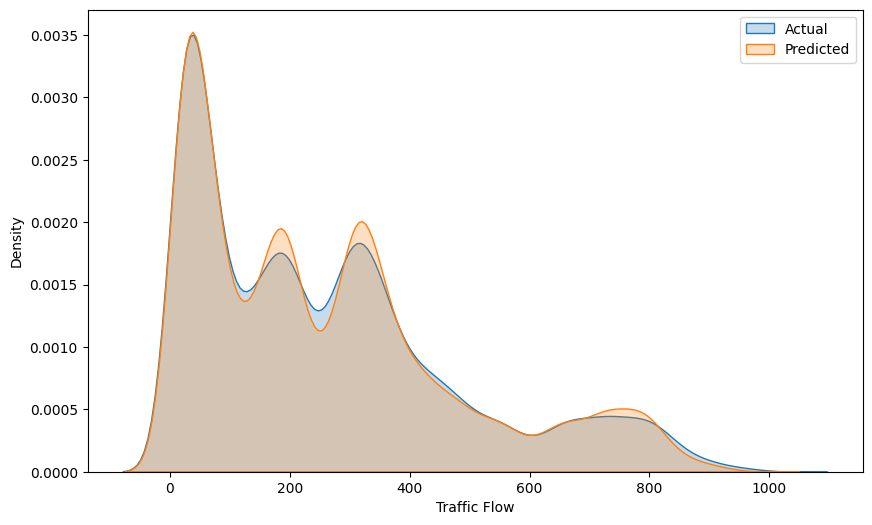

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.kdeplot(results['Actual'], label='Actual', shade=True)
sns.kdeplot(results['Predicted'], label='Predicted', shade=True)
plt.xlabel('Traffic Flow')
plt.ylabel('Density')
plt.legend()
plt.show()


In [316]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


n_estimators = 100  
learning_rate = .1  
gradient_boosting_model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42 )

gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

mae_gradient_boosting = mae
rmse_gradient_boosting = rmse
r2_gradient_boosting = r2


Mean Absolute Error (MAE): 36.23
Root Mean Squared Error (RMSE): 51.96
R-squared (R2) Score: 0.95


C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Actual'], label='Actual', shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Predicted'], label='Predicted', shade=True)


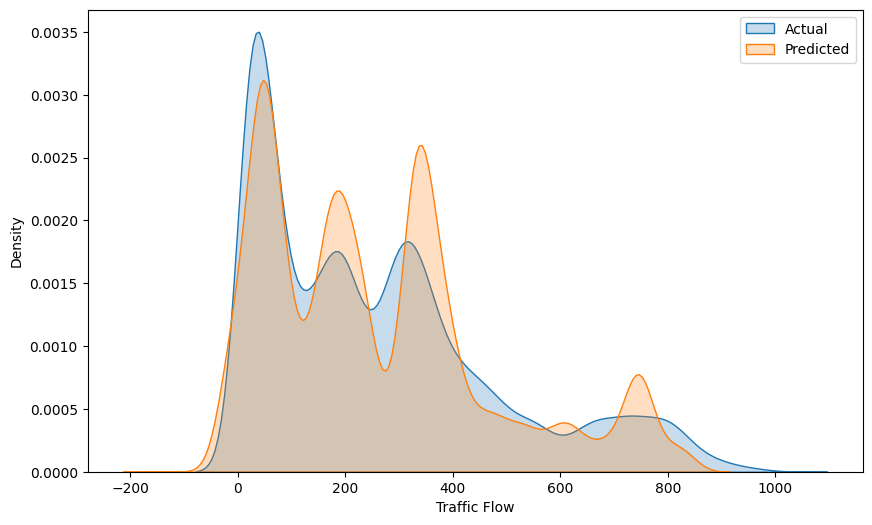

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.kdeplot(results['Actual'], label='Actual', shade=True)
sns.kdeplot(results['Predicted'], label='Predicted', shade=True)
plt.xlabel('Traffic Flow')
plt.ylabel('Density')
plt.legend()
plt.show()


In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


max_depth = 10  
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

mae_decision_tree = mae
rmse_decision_tree = rmse
r2_decision_tree = r2


Mean Absolute Error (MAE): 26.16
Root Mean Squared Error (RMSE): 41.18
R-squared (R2) Score: 0.97


C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Actual'], label='Actual', shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Predicted'], label='Predicted', shade=True)


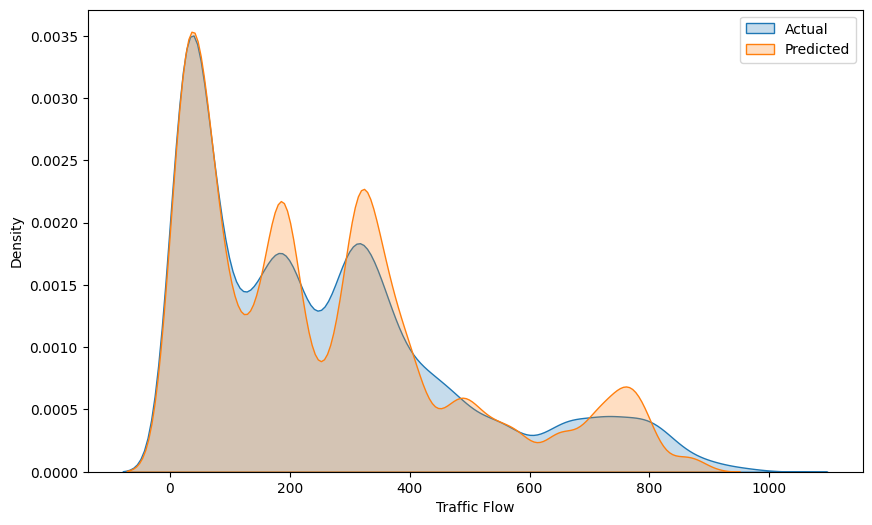

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.kdeplot(results['Actual'], label='Actual', shade=True)
sns.kdeplot(results['Predicted'], label='Predicted', shade=True)
plt.xlabel('Traffic Flow')
plt.ylabel('Density')
plt.legend()
plt.show()


In [320]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

mae_xgboost = mae
rmse_xgboost = rmse
r2_xgboost = r2


c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtyp

Mean Absolute Error (MAE): 24.23
Root Mean Squared Error (RMSE): 38.31
R-squared (R2) Score: 0.97


c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Divyaditya Bhardwaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtyp

C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Actual'], label='Actual', shade=True)
C:\Users\Divyaditya Bhardwaj\AppData\Local\Temp\ipykernel_12864\2624145538.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(results['Predicted'], label='Predicted', shade=True)


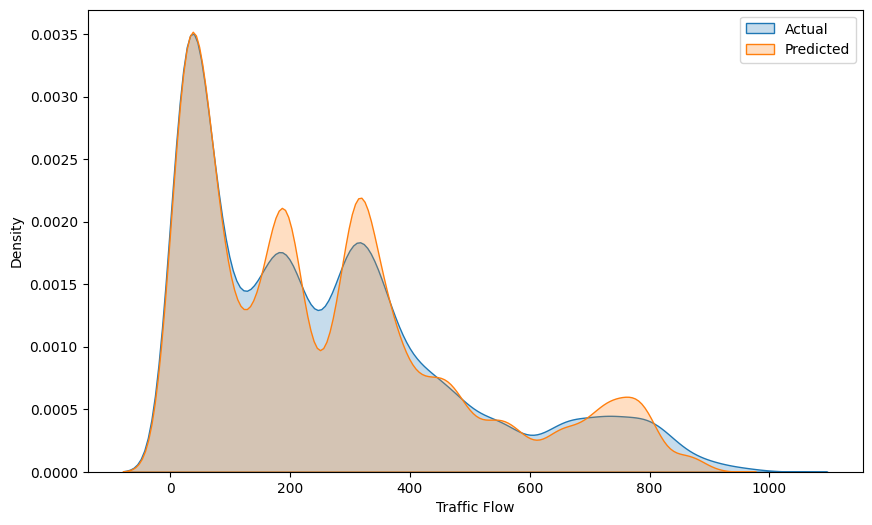

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
sns.kdeplot(results['Actual'], label='Actual', shade=True)
sns.kdeplot(results['Predicted'], label='Predicted', shade=True)
plt.xlabel('Traffic Flow')
plt.ylabel('Density')
plt.legend()
plt.show()


In [322]:
import pandas as pd

model_metrics = {
    'Model Name': ['Random Forest', 'Gradient Boosting','Decision Tree','XGboost'],
    'MAPE': [ mae_random_forest, mae_gradient_boosting, mae_decision_tree , mae_xgboost],
    'RMSE': [ rmse_random_forest, rmse_gradient_boosting, rmse_decision_tree , rmse_xgboost],
    'R^2': [  r2_random_forest, r2_gradient_boosting, r2_decision_tree , r2_xgboost]
}

df = pd.DataFrame(model_metrics)

print(df)


          Model Name       MAPE       RMSE       R^2
0      Random Forest  28.128795  44.251677  0.961349
1  Gradient Boosting  36.229058  51.955005  0.946721
2      Decision Tree  26.162525  41.181715  0.966526
3            XGboost  24.231538  38.305512  0.971038


weekend data

          Model Name       MAPE       RMSE       R^2
0      Random Forest  36.417379  56.306079  0.918879
1  Gradient Boosting  35.609171  52.100416  0.930545
2      Decision Tree  33.183348  49.894713  0.936301
3            XGboost  32.320556  48.397018  0.940068

weekday data

          Model Name       MAPE       RMSE       R^2
0      Random Forest  28.128795  44.251677  0.961349
1  Gradient Boosting  36.229058  51.955005  0.946721
2      Decision Tree  26.162525  41.181715  0.966526
3            XGboost  24.231538  38.305512  0.971038


school holidays data

          Model Name       MAPE       RMSE       R^2
0      Random Forest  30.882450  49.519812  0.951917
1  Gradient Boosting  37.032086  53.994083  0.942835
2      Decision Tree  28.099020  45.997284  0.958514
3            XGboost  26.834088  43.397323  0.963072


bank holidays data 

          Model Name       MAPE       RMSE       R^2
0      Random Forest  34.345380  52.974153  0.937328
1  Gradient Boosting  34.451216  50.337468  0.943412
2      Decision Tree  32.948576  52.646758  0.938100
3            XGboost  31.788793  48.447649  0.947581



To find patterns in irregularity within your traffic data, you can use various data analysis and machine learning techniques. Here are the steps you can follow:

1. **Data Preprocessing:**
   - Ensure your data is clean, without missing values or outliers.
   - Convert categorical features into numerical representations using techniques like one-hot encoding or label encoding.

2. **Feature Selection:**
   - Identify relevant features for detecting irregularities. This could include attributes like 'Total Traffic Flow,' 'Hour,' 'Day Type ID,' etc.

3. **Data Exploration:**
   - Visualize your data to understand the distribution of features and irregularity occurrences.
   - Use statistical methods to identify potential patterns or correlations.

4. **Supervised Learning (Classification):**
   - Use supervised machine learning techniques to build a classifier that predicts irregularities based on input features.
   - Split your data into training and testing sets.
   - Train a classification model (e.g., Random Forest, Support Vector Machine, Logistic Regression) on your training data.

5. **Unsupervised Learning (Clustering):**
   - Utilize unsupervised learning techniques to group similar instances together.
   - Techniques like k-means clustering or hierarchical clustering can help identify patterns.

6. **Time-Series Analysis:**
   - Irregularities in traffic data often have a time-dependent aspect. Time-series analysis methods like ARIMA, Prophet, or deep learning-based models (LSTM, GRU) can capture temporal patterns.

7. **Anomaly Detection:**
   - Use anomaly detection algorithms (e.g., Isolation Forest, One-Class SVM) to identify unusual patterns in the data.

8. **Feature Importance:**
   - Analyze feature importance to understand which attributes contribute most to detecting irregularities.

9. **Model Evaluation:**
   - Evaluate the performance of your models using metrics like precision, recall, F1-score, and ROC-AUC, depending on your choice of models.

10. **Visualization:**
   - Create visualizations to represent the patterns detected by your models.

11. **Pattern Interpretation:**
   - Interpret the patterns to derive actionable insights. What do the irregularity patterns suggest? Are there recurring factors like time of day, road type, or weather conditions that contribute to irregularities?

12. **Further Investigation:**
   - Investigate the root causes of the identified irregularities. This may involve domain expertise or further data collection.

Remember that finding meaningful patterns in irregular traffic data can be a complex task and may require a combination of the above techniques. It's also essential to collaborate with domain experts who understand the specific factors that can lead to traffic irregularities in your context.



Graph Convolutional Networks (GCNs): GCNs are specifically designed for graph-based data, making them a natural choice for irregularity analysis in your traffic data. They consider the structure of the graph and learn node embeddings by aggregating information from neighboring nodes. GCNs can be used for tasks like node classification or graph classification.

Graph Neural Networks (GNNs): GNNs are a more general class of models that include GCNs. They can be used for various graph-based tasks, including irregularity pattern detection. GNNs can capture complex relationships in the graph data.

Graph Attention Networks (GATs): GATs are an extension of GCNs that use attention mechanisms to assign different importance to neighboring nodes. They are effective for tasks where nodes might have varying influence on each other.

Graph Autoencoders: Graph autoencoders are used for unsupervised learning and can be applied to learn representations of nodes in your graph data. These learned embeddings can then be used for various downstream tasks, including irregularity detection.

Graph Recurrent Networks: If your graph data has a temporal component, you can consider graph recurrent networks, which are extensions of recurrent neural networks (RNNs) adapted for graph-structured data with a temporal aspect.

Spatial-Temporal Graph Networks: These models are designed for analyzing both spatial and temporal patterns in graph-structured data. They are suitable for tasks like traffic irregularity prediction where both spatial and temporal factors are important.

Convolutional Neural Networks (CNNs) on Graphs: While not a direct application of CNNs, some techniques extend CNN concepts to graph data. Models like ChebNet and GraphSAGE can be used for graph data analysis, although they might not capture irregularities as effectively as graph-specific models.